In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, y_train = x_train[:2000]/255.0, y_train[:2000]
x_test, y_test = x_test[:1000]/255.0, y_test[:1000]


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


In [3]:
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(32,32,3),
    include_top=False,
    weights="imagenet"
)
base_model.trainable = False


/tmp/ipython-input-417002003.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [4]:
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])


In [5]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 49s 470ms/step - accuracy: 0.1269 - loss: 2.2789 - val_accuracy: 0.2430 - val_loss: 2.1807
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2727 - loss: 2.1302 - val_accuracy: 0.2690 - val_loss: 2.0663
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2979 - loss: 2.0020 - val_accuracy: 0.2720 - val_loss: 2.0064
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3251 - loss: 1.9299 - val_accuracy: 0.2580 - val_loss: 1.9845
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3352 - loss: 1.8873 - val_accuracy: 0.2760 - val_loss: 1.9620


In [6]:
for layer in base_model.layers[-20:]:
    layer.trainable = True

model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history_finetune = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 178ms/step - accuracy: 0.1231 - loss: 5.0306 - val_accuracy: 0.2710 - val_loss: 1.9764
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1634 - loss: 3.9482 - val_accuracy: 0.2520 - val_loss: 2.0292
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.2086 - loss: 3.4508 - val_accuracy: 0.2340 - val_loss: 2.0659
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.2208 - loss: 3.1258 - val_accuracy: 0.2310 - val_loss: 2.0927
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.2373 - loss: 2.9267 - val_accuracy: 0.2150 - val_loss: 2.1252


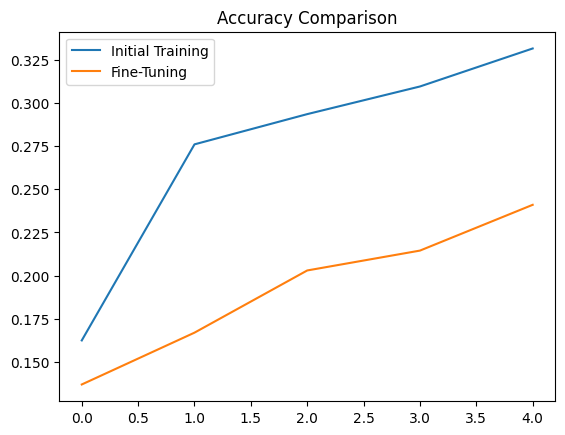

In [7]:
plt.plot(history.history["accuracy"], label="Initial Training")
plt.plot(history_finetune.history["accuracy"], label="Fine-Tuning")
plt.legend()
plt.title("Accuracy Comparison")
plt.show()
